### Student Information
Name: Jonathan Benjamin Oliva Salinas

Student ID: 107065423

GitHub ID: 10662970

---

# 20 % Part

## Data Preparation

In [1]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

### ** >>> Exercise 1 (5 min): **  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [2]:
# Answer here
for t in twenty_train.target[:3]:
    print(twenty_train.target_names[t])

comp.graphics
comp.graphics
soc.religion.christian


## Data Transformation

In [3]:
import pandas as pd

# helpers functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [4]:
# add category to the dataframe
X['category'] = twenty_train.target

In [5]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [6]:
# Answer here 
X.iloc[::10,:][0:10][["text","category_name"]]

,text,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,comp.graphics
10,From: anasaz!karl@anasazi.com (Karl Dussik) Su...,soc.religion.christian
20,From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...,soc.religion.christian
30,From: vgwlu@dunsell.calgary.chevron.com (greg ...,sci.med
40,From: david-s@hsr.no (David A. Sjoen) Subject:...,soc.religion.christian
50,From: ab@nova.cc.purdue.edu (Allen B) Subject:...,comp.graphics
60,From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...,alt.atheism
70,From: weaver@chdasic.sps.mot.com (Dave Weaver)...,soc.religion.christian
80,From: annick@cortex.physiol.su.oz.au (Annick A...,sci.med
90,Subject: Vonnegut/atheism From: dmn@kepler.unh...,alt.atheism


### ** >>> Exercise 3 (5 min): **  
Try to fecth records belonging to the ```sci.med``` category, and query every 10th record. Only show the first 5 records.

In [7]:
# Answer here
X.loc[X["category_name"]=="sci.med", :][::10][0:5]

,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
49,From: jimj@contractor.EBay.Sun.COM (Jim Jones)...,2,sci.med
82,From: jason@ab20.larc.nasa.gov (Jason Austin) ...,2,sci.med
118,From: rogers@calamari.hi.com (Andrew Rogers) S...,2,sci.med
142,From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...,2,sci.med


## Data mining with Pandas

### Missing Values

### >>> **Exercise 4 (5 min):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [8]:
# Answer here 
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
5       (The amoung of missing records is: , 0)
6       (The amoung of missing records is: , 0)
7       (The amoung of missing records is: , 0)
8       (The amoung of missing records is: , 0)
9       (The amoung of missing records is: , 0)
10      (The amoung of missing records is: , 0)
11      (The amoung of missing records is: , 0)
12      (The amoung of missing records is: , 0)
13      (The amoung of missing records is: , 0)
14      (The amoung of missing records is: , 0)
15      (The amoung of missing records is: , 0)
16      (The amoung of missing records is: , 0)
17      (The amoung of missing records is: , 0)
18      (The amoung of missing records is: , 0)
19      (The amoung of missing records is: , 0)
20      (The amoung of missing records i

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

#### Answer here Exercise 5
Because it identify string values like "NaN", "None" and "" not like null values, but like a normal string value.

In [9]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [10]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

## Data Preprocessing

### Sampling

In [11]:
X_sample = X.sample(n=1000) #randow state

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

#### Answer here
The dataframe's length changed, the tuple's order changed, they are random rows

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

### >>> **Exercise 7 (5 min):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

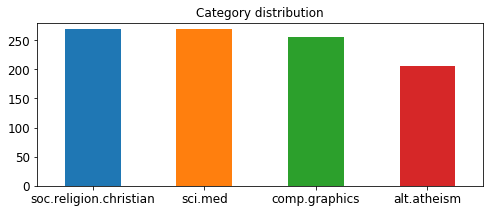

In [13]:
# Answer here
upper_top = max(X_sample.category_name.value_counts()) + 10

X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_top], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

---

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

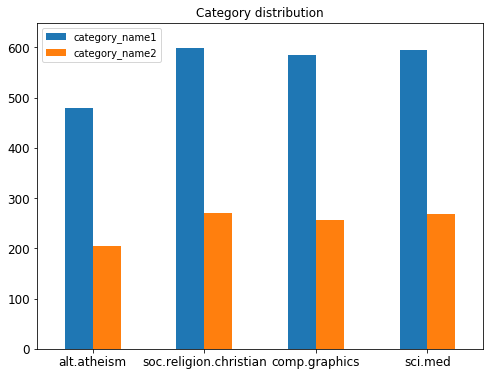

In [14]:
# Answer here ??
# X_sample.groupby('category_name').category_name.value_counts().plot(kind='bar')
upper_top2 = max(X.category_name.value_counts()) + 50
x_sample_vs_original = pd.DataFrame({'category_name1':X.category_name.value_counts(),'category_name2':X_sample.category_name.value_counts()},index=categories)
x_sample_vs_original.plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_top2], 
                                           rot = 0, fontsize = 12, figsize = (8,6))

### Feature Creation and Feature subset selection

In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Jonathan
[nltk_data]     Oliva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #fitting the text

### **>>> Exercise 9 (5 min):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [18]:
# Answer here
analyze = count_vect.build_analyzer()
analyze(" ".join(list(X[0:1].text)))


['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [19]:
# Answer here
X_areglo = X_counts[4:5,0:100].toarray()
sComentIndex = "is the index and the term is: "

for idx, val in enumerate(X_areglo[0]): 
    if val == 1:
        print(idx, sComentIndex, count_vect.get_feature_names()[idx])

0 is the index and the term is:  00
37 is the index and the term is:  01


### >>> Exercise 11 (take home):

import seaborn as sns

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

plot_z = X_counts[0:20, 0:20].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)

plt.subplots(figsize=(7, 8))

ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

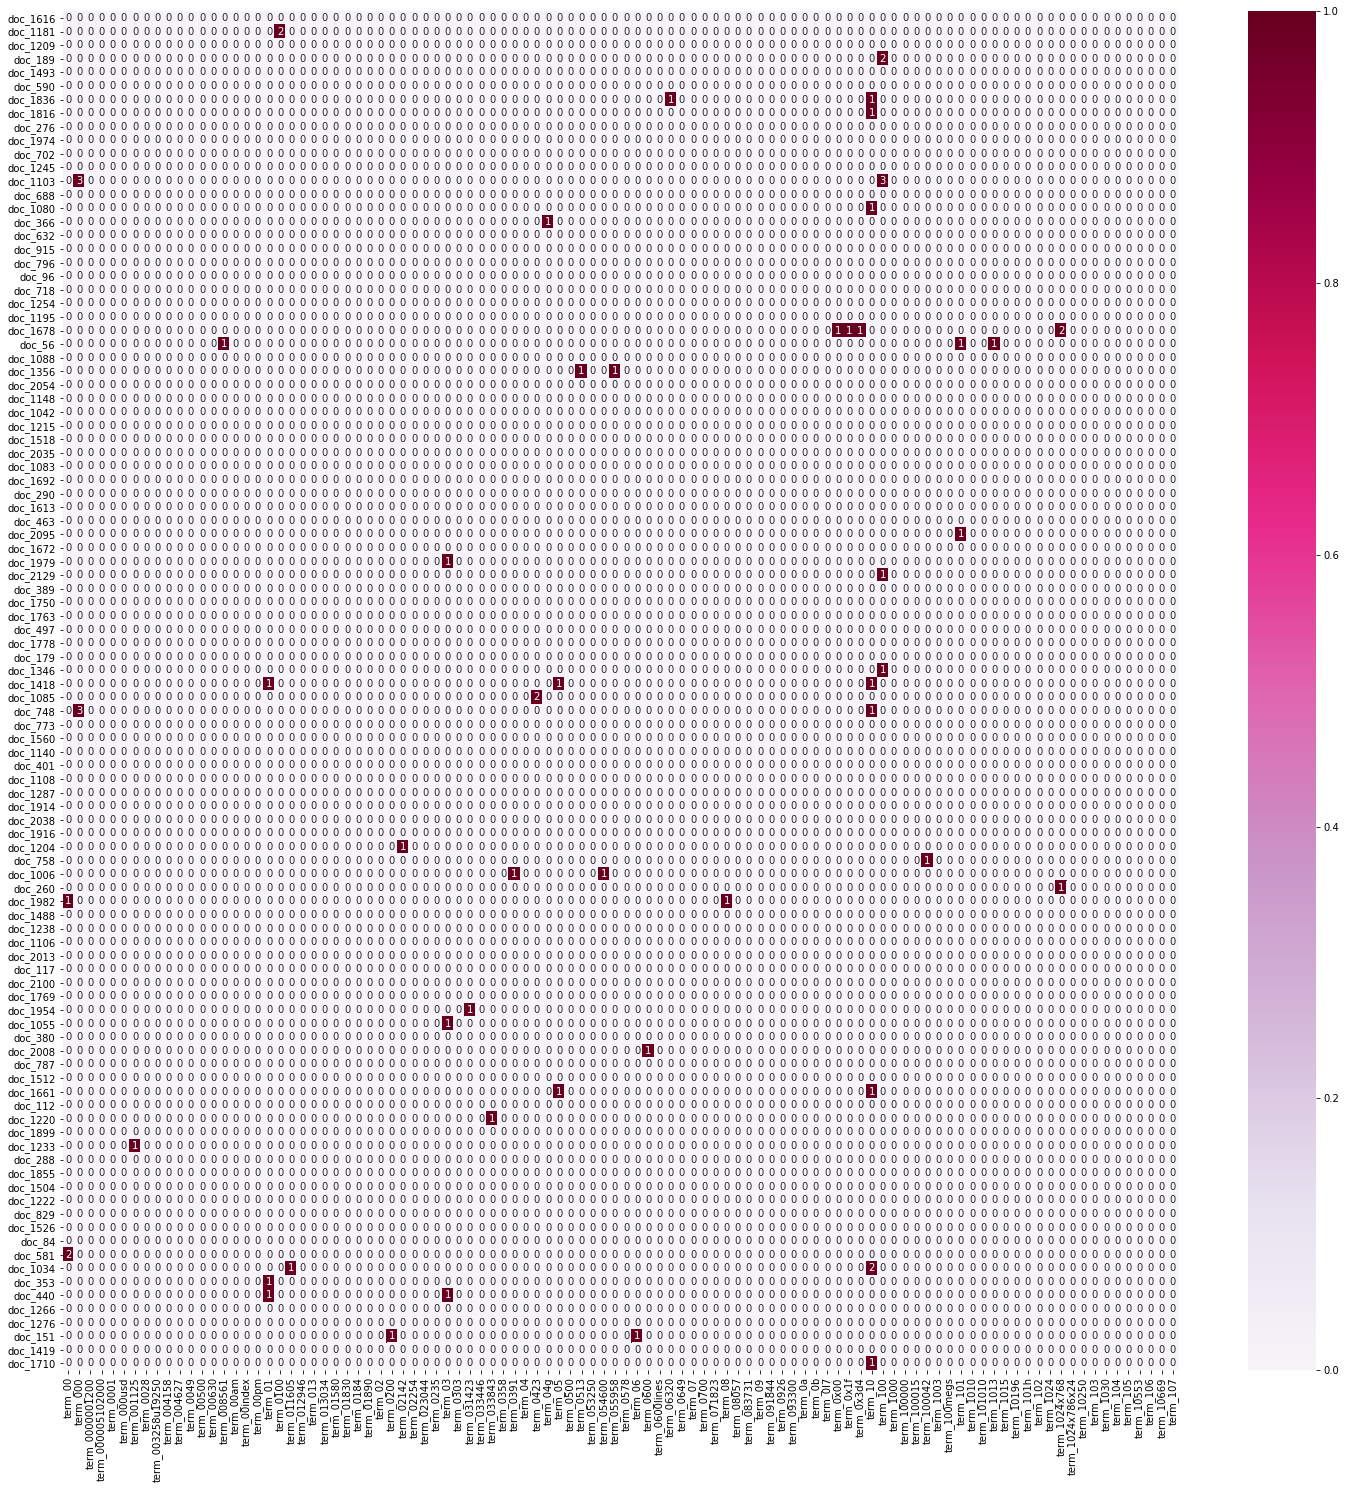

In [20]:
# Answer here
#I found that in the document 189 (9th), the term 100 has a frequency of 2

# to give one possibility to all the values to be selected I used a random sample,
# also with the intention to wait less time the processing of the data
import seaborn as sns
plot_sample = X.sample(n=500)
count_vect_sample = CountVectorizer()
X_counts_sample = count_vect_sample.fit_transform(plot_sample.text)
# in order to have a good visualization I chose to use only 110 terms
plot_x_sample = ["term_"+str(i) for i in count_vect_sample.get_feature_names()[0:100]]
plot_y_sample = ["doc_"+ str(i) for i in list(plot_sample.index)[0:100]]
plot_z_sample = X_counts_sample[0:100, 0:100].toarray()
df_todraw_sample = pd.DataFrame(plot_z_sample, columns = plot_x_sample, index = plot_y_sample)
#I increased the size to have better visualization.
plt.subplots(figsize=(25, 25))
ax_sample = sns.heatmap(df_todraw_sample,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### Dimensionality Reduction

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

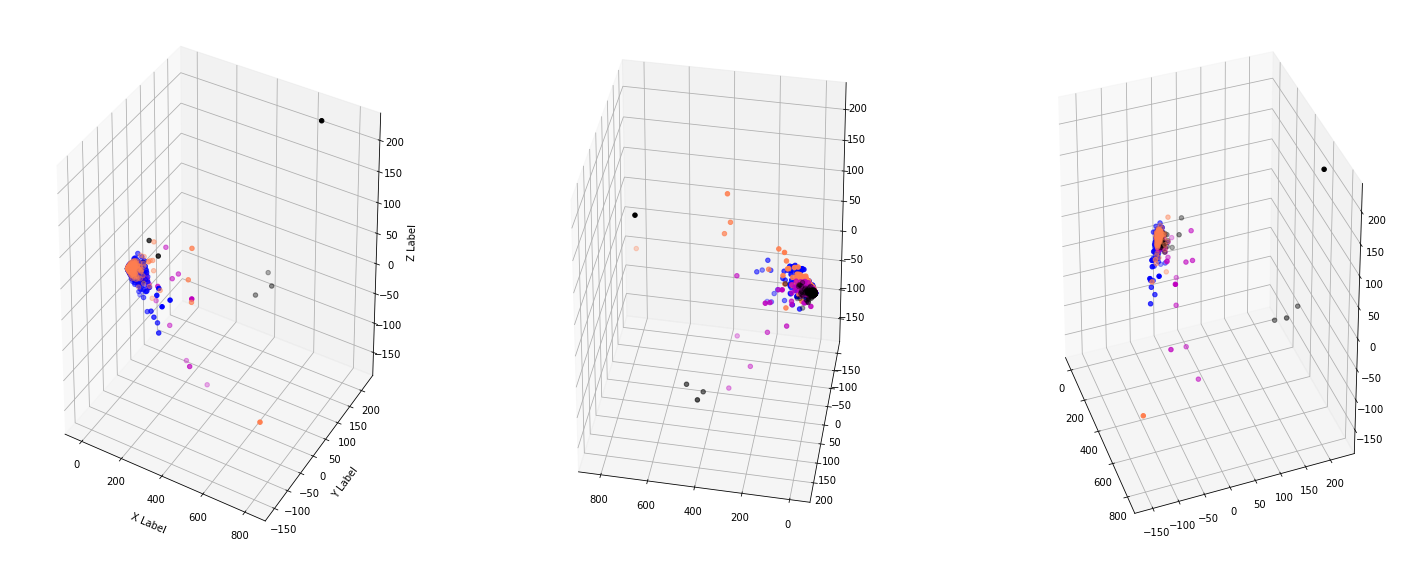

In [21]:
# Answer here
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
col = ['coral', 'blue', 'black', 'm']
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
X_reduced.shape

fig = plt.figure(figsize = (25,10))
ax1h = fig.add_subplot(131, projection='3d')
ax2h = fig.add_subplot(1, 3, 2, projection='3d')
ax3h = fig.add_subplot(1, 3, 3, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax1h.scatter(xs, ys, zs, c=c, marker='o')
    ax2h.scatter(xs, ys, zs, c=c, marker='o')
    ax3h.scatter(xs, ys, zs, c=c, marker='o')

ax1h.set_xlabel('\nX Label')
ax1h.set_ylabel('\nY Label')
ax1h.set_zlabel('\nZ Label')


ax2h.view_init(30, 100)
ax3h.view_init(30, 340)


plt.show()

#the visualization showed us that a big part of the data don't have the features that we are using, the data is very sparsed



### Atrribute Transformation / Aggregation

In [22]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0] #this is more efficient than the previous

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this. Check last year's [notebook](https://github.com/omarsar/data_mining_2017_fall_lab/blob/master/news_data_mining.ipynb) for code on how to generate the interactive version of the plot above. 

In [23]:
# Answer here
import plotly as ptly1
import plotly.plotly as ptly
import math
ptly1.tools.set_credentials_file(username='Jonaoliv', api_key='eIFDyiWhO0sEmc0uwUI9')
import plotly.graph_objs as go
term_frequencies_log = [math.log(i) for i in term_frequencies]
word_list = [count_vect.get_feature_names(), term_frequencies_log]

trace1 = {"x": list(word_list[0]),"y": list(word_list[1]),"type": "bar"}
data = go.Data([trace1])

layout = {"title": "Exercise 13","yaxis": {"title": "Frequency"}}

fig = go.Figure(data = data, layout=layout)

ptly.iplot(fig)

C:\Anaconda\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




The draw time for this plot will be slow for clients without much RAM.


C:\Anaconda\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Slow



### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [24]:
# Answer here
term_frequencies_log = [math.log(i) for i in term_frequencies[:130]]
word_list = [count_vect.get_feature_names(), term_frequencies_log]

trace1 = {"x": list(word_list[0]),"y": list(word_list[1]),"type": "bar"}
data = go.Data([trace1])

layout = {"title": "Exercise 14","yaxis": {"title": "Frequency"}}

fig = go.Figure(data = data, layout=layout)

ptly.iplot(fig)


C:\Anaconda\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




The draw time for this plot will be slow for clients without much RAM.


C:\Anaconda\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Slow



### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [25]:
# Answer here
X_tail = pd.DataFrame.from_dict(count_vect.get_feature_names())
X_tail["term_frequencies_log"] = [math.log(i) for i in term_frequencies]
X_tail = X_tail.sort_values("term_frequencies_log",ascending=False)

traceLongTail = {"x": list(X_tail[0]),"y": list(X_tail.term_frequencies_log),"type": "bar"}
data = go.Data([traceLongTail])
layout = {"title": "Exercise 15","yaxis": {"title": "Frequency"}}

fig = go.Figure(data = data, layout=layout)
ptly.iplot(fig)


C:\Anaconda\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




The draw time for this plot will be slow for clients without much RAM.


C:\Anaconda\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Slow



### Discretization and Binarization

In [26]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category']).tolist()
X[0:9]

,text,category,category_name,unigrams,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]"


### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [27]:
# Answer here
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[:9]
#it worked, it assigned one integer to each value to later convert it in a binary form

,text,category,category_name,unigrams,bin_category,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]","[0, 0, 1, 0]"


# 30 % part

Then, you are asked to apply each of the data exploration and data operation steps learned in the first lab session on the new dataset. You don't need to explain all the procedures as we did in the notebook, but you are expected to provide some minimal comments explaining your code. You are also expected to use the same libraries used in the first lab session. You are allowed to use and modify the helper functions we provided in the first lab session or create your own. Also, be aware that the helper functions may need modification as you are dealing with a completely different dataset. This part is worth 30% of your grade!

## New dataset

In [28]:
import pandas as pd
import helpers.data_mining_helpers as dmh

column_names = ['sentence','score']
path_imdb='C:\\Users\\Jonathan\\dm_2018_hw_1\\sentiment_labelled_sentences\\imdb_labelled.txt'
#to avoid losing rows because if we use only \t, we will lose 152 tuples
X_imdb = pd.read_csv(path_imdb, sep="\t+", header=None,  names = column_names,error_bad_lines = False, warn_bad_lines = True, engine = "python")
X_imdb[0:9]

,sentence,score
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
5,"The rest of the movie lacks art, charm, meanin...",0
6,Wasted two hours.,0
7,Saw the movie today and thought it was a good ...,1
8,A bit predictable.,0


In [29]:
path_amazon='C:\\Users\\Jonathan\\dm_2018_hw_1\\sentiment_labelled_sentences\\amazon_cells_labelled.txt'

X_amazon = pd.read_csv(path_amazon, sep="\t", header=None, names = column_names)
X_amazon[0:9]

,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0


In [30]:
path_yelp='C:\\Users\\Jonathan\\dm_2018_hw_1\\sentiment_labelled_sentences\\yelp_labelled.txt'

X_yelp = pd.read_csv(path_yelp, sep="\t", header=None, names = column_names)
X_yelp[0:9]

,sentence,score
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1


In [31]:
#to be sure we have all the 1000 rows from each dataset
len(X_imdb)

1000

In [32]:
len(X_amazon)

1000

In [33]:
len(X_yelp)

1000

In [34]:
#creating one dataframe with all the datasets in a concatenated form
frames = [X_yelp, X_amazon, X_imdb]
X_labelled = pd.concat(frames)
len(X_labelled)

3000

In [35]:
#we added two categories
score = ["Negative","Positive"]
score

['Negative', 'Positive']

In [36]:
X_labelled["score_name"] = X_labelled.score.apply(lambda t: score[t])
X_labelled[0:10]

,sentence,score,score_name
0,Wow... Loved this place.,1,Positive
1,Crust is not good.,0,Negative
2,Not tasty and the texture was just nasty.,0,Negative
3,Stopped by during the late May bank holiday of...,1,Positive
4,The selection on the menu was great and so wer...,1,Positive
5,Now I am getting angry and I want my damn pho.,0,Negative
6,Honeslty it didn't taste THAT fresh.),0,Negative
7,The potatoes were like rubber and you could te...,0,Negative
8,The fries were great too.,1,Positive
9,A great touch.,1,Positive


### Testing our new dataframe

In [37]:
X_labelled[0:10][["sentence","score_name"]]

,sentence,score_name
0,Wow... Loved this place.,Positive
1,Crust is not good.,Negative
2,Not tasty and the texture was just nasty.,Negative
3,Stopped by during the late May bank holiday of...,Positive
4,The selection on the menu was great and so wer...,Positive
5,Now I am getting angry and I want my damn pho.,Negative
6,Honeslty it didn't taste THAT fresh.),Negative
7,The potatoes were like rubber and you could te...,Negative
8,The fries were great too.,Positive
9,A great touch.,Positive


In [38]:
X_labelled[-10:]

,sentence,score,score_name
990,"The opening sequence of this gem is a classic,...",1,Positive
991,Fans of the genre will be in heaven.,1,Positive
992,Lange had become a great actress.,1,Positive
993,It looked like a wonderful story.,1,Positive
994,I never walked out of a movie faster.,0,Negative
995,I just got bored watching Jessice Lange take h...,0,Negative
996,"Unfortunately, any virtue in this film's produ...",0,Negative
997,"In a word, it is embarrassing.",0,Negative
998,Exceptionally bad!,0,Negative
999,All in all its an insult to one's intelligence...,0,Negative


In [39]:
X_labelled.iloc[::10, 0:2][0:10]

,sentence,score
0,Wow... Loved this place.,1
10,Service was very prompt.,1
20,The Burrittos Blah!,0
30,"Also there are combos like a burger, fries, an...",1
40,The shrimp tender and moist.,1
50,We ordered the duck rare and it was pink and t...,1
60,At least think to refill my water before I str...,0
70,"The deal included 5 tastings and 2 drinks, and...",1
80,Coming here is like experiencing an underwhelm...,0
90,"In summary, this was a largely disappointing d...",0


In [40]:
X_labelled.loc[::10, 'sentence'][0:10]

0                              Wow... Loved this place.
10                             Service was very prompt.
20                                  The Burrittos Blah!
30    Also there are combos like a burger, fries, an...
40                         The shrimp tender and moist.
50    We ordered the duck rare and it was pink and t...
60    At least think to refill my water before I str...
70    The deal included 5 tastings and 2 drinks, and...
80    Coming here is like experiencing an underwhelm...
90    In summary, this was a largely disappointing d...
Name: sentence, dtype: object

In [41]:
X_labelled[::10][0:10]

,sentence,score,score_name
0,Wow... Loved this place.,1,Positive
10,Service was very prompt.,1,Positive
20,The Burrittos Blah!,0,Negative
30,"Also there are combos like a burger, fries, an...",1,Positive
40,The shrimp tender and moist.,1,Positive
50,We ordered the duck rare and it was pink and t...,1,Positive
60,At least think to refill my water before I str...,0,Negative
70,"The deal included 5 tastings and 2 drinks, and...",1,Positive
80,Coming here is like experiencing an underwhelm...,0,Negative
90,"In summary, this was a largely disappointing d...",0,Negative


In [42]:
X_labelled.iloc[::10, :][0:10]

,sentence,score,score_name
0,Wow... Loved this place.,1,Positive
10,Service was very prompt.,1,Positive
20,The Burrittos Blah!,0,Negative
30,"Also there are combos like a burger, fries, an...",1,Positive
40,The shrimp tender and moist.,1,Positive
50,We ordered the duck rare and it was pink and t...,1,Positive
60,At least think to refill my water before I str...,0,Negative
70,"The deal included 5 tastings and 2 drinks, and...",1,Positive
80,Coming here is like experiencing an underwhelm...,0,Negative
90,"In summary, this was a largely disappointing d...",0,Negative


In [43]:
X_labelled.loc[X_labelled["score_name"]=="Positive", :][::10][0:5]

,sentence,score,score_name
0,Wow... Loved this place.,1,Positive
23,I could care less... The interior is just beau...,1,Positive
40,The shrimp tender and moist.,1,Positive
55,"Loved it...friendly servers, great food, wonde...",1,Positive
70,"The deal included 5 tastings and 2 drinks, and...",1,Positive


### Finding missing values

In [44]:
X_labelled.isnull()

,sentence,score,score_name
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [45]:
#Using function to find missing values
X_labelled.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence      (The amoung of missing records is: , 0)
score         (The amoung of missing records is: , 0)
score_name    (The amoung of missing records is: , 0)
dtype: object

In [46]:
X_labelled.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
5      (The amoung of missing records is: , 0)
6      (The amoung of missing records is: , 0)
7      (The amoung of missing records is: , 0)
8      (The amoung of missing records is: , 0)
9      (The amoung of missing records is: , 0)
10     (The amoung of missing records is: , 0)
11     (The amoung of missing records is: , 0)
12     (The amoung of missing records is: , 0)
13     (The amoung of missing records is: , 0)
14     (The amoung of missing records is: , 0)
15     (The amoung of missing records is: , 0)
16     (The amoung of missing records is: , 0)
17     (The amoung of missing records is: , 0)
18     (The amoung of missing records is: , 0)
19     (The amoung of missing records is: , 0)
20     (The amoung of missing records is: , 0)
21     (The a

In [47]:
#creating dummie values to know if the function is working, like in the 20 % part
dummy_series = pd.Series(["dummy_record", 1], index=["sentence", "score"])
dummy_series

sentence    dummy_record
score                  1
dtype: object

In [48]:
result_with_series = X_labelled.append(dummy_series, ignore_index=True)
len(result_with_series)

3001

In [49]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence      (The amoung of missing records is: , 0)
score         (The amoung of missing records is: , 0)
score_name    (The amoung of missing records is: , 1)
dtype: object

In [50]:
dummy_dict = [{'sentence': 'dummy_record',
               'score': 1
              }]
X_labelled = X_labelled.append(dummy_dict, ignore_index=True)
len(X_labelled)

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike



3001

In [51]:
X_labelled.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence      (The amoung of missing records is: , 0)
score         (The amoung of missing records is: , 0)
score_name    (The amoung of missing records is: , 1)
dtype: object

In [52]:
X_labelled.dropna(inplace=True)
X_labelled.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence      (The amoung of missing records is: , 0)
score         (The amoung of missing records is: , 0)
score_name    (The amoung of missing records is: , 0)
dtype: object

In [53]:
len(X_labelled)

3000

### Finding Duplicate Values

I found we have duplicated data. I decided drop it off.

In [54]:
X_labelled.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2970    False
2971    False
2972    False
2973    False
2974    False
2975    False
2976    False
2977    False
2978    False
2979    False
2980    False
2981    False
2982    False
2983    False
2984    False
2985    False
2986    False
2987    False
2988    False
2989    False
2990    False
2991    False
2992    False
2993    False
2994    False
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [55]:
sum(X_labelled.duplicated())

17

In [56]:
sum(X_labelled.duplicated("sentence"))

17

In [57]:
sum(X_yelp.duplicated())

4

In [58]:
sum(X_imdb.duplicated())

3

In [59]:
sum(X_amazon.duplicated())

10

In [60]:
#to eliminate duplicated values 
X_labelled.drop_duplicates(keep=False, inplace=True)
len(X_labelled)

2966

### Sampling

In [61]:
X_sample = X_labelled.sample(n=500) #randow state
#we are going to use these randow values later in some visualizations
len(X_sample)

500

In [62]:
X_sample[0:4]

,sentence,score,score_name
138,"He was extremely rude and really, there are so...",0,Negative
500,I also had to taste my Mom's multi-grain pumpk...,1,Positive
2023,"It's quite simply the highest, most superlativ...",1,Positive
465,The food was outstanding and the prices were v...,1,Positive


In [63]:
import matplotlib.pyplot as plt

Negative    1486
Positive    1480
Name: score_name, dtype: int64


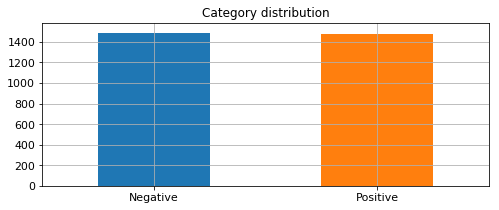

In [64]:
print(X_labelled.score_name.value_counts())
upper_top1 = max(X_labelled.score_name.value_counts()) + 100

# plot barchart for original dataframe
X_labelled.score_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, upper_top1],        
                                    rot = 0, fontsize = 11, figsize = (8,3),grid=True)

#We have more negative than positive opinions after I eliminated the duplicated data

Without duplicated data we have more negative  than positive opinions

Negative    263
Positive    237
Name: score_name, dtype: int64


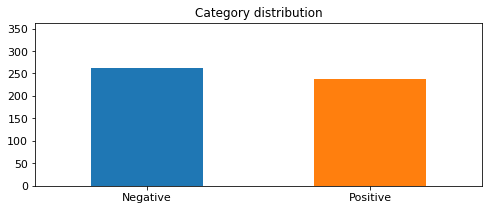

In [65]:
print(X_sample.score_name.value_counts())
upper_top2 = max(X_sample.score_name.value_counts()) + 100

# plot barchart for original dataframe
X_sample.score_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, upper_top2],        
                                    rot = 0, fontsize = 11, figsize = (8,3))
#depending of the sample (because its random), we can have more positive opinions 

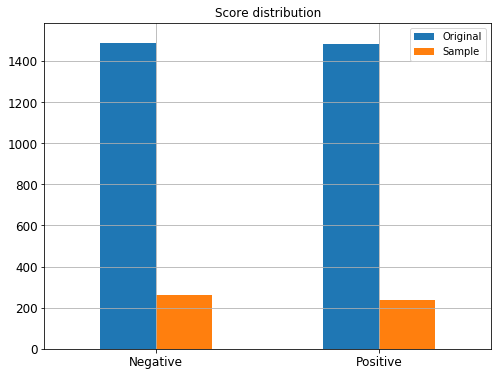

In [66]:
x_sample_vs_original = pd.DataFrame({'Original':X_labelled.score_name.value_counts(),'Sample':X_sample.score_name.value_counts()},index=score)
x_sample_vs_original.plot(kind = 'bar',
                                           title = 'Score distribution',
                                           ylim = [0, upper_top1], 
                                           rot = 0, fontsize = 12, figsize = (8,6), grid=True)
#we have more negative scores than positive in the original because we eliminate the duplicates.
#however when we use sample that could change

### Feature Creation

#### Unigrams

In [67]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Jonathan
[nltk_data]     Oliva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [68]:
X_labelled['unigrams'] = X_labelled['sentence'].apply(lambda x: dmh.tokenize_text(x))
X_labelled[0:4]["unigrams"]

0                    [Wow, ..., Loved, this, place, .]
1                            [Crust, is, not, good, .]
2    [Not, tasty, and, the, texture, was, just, nas...
3    [Stopped, by, during, the, late, May, bank, ho...
Name: unigrams, dtype: object

In [69]:
X_labelled[0:4]

,sentence,score,score_name,unigrams
0,Wow... Loved this place.,1,Positive,"[Wow, ..., Loved, this, place, .]"
1,Crust is not good.,0,Negative,"[Crust, is, not, good, .]"
2,Not tasty and the texture was just nasty.,0,Negative,"[Not, tasty, and, the, texture, was, just, nas..."
3,Stopped by during the late May bank holiday of...,1,Positive,"[Stopped, by, during, the, late, May, bank, ho..."


In [70]:
list(X_labelled[0:1]['unigrams'])

[['Wow', '...', 'Loved', 'this', 'place', '.']]

#### Word frequency vectors

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X_labelled.sentence)
X_counts

<2966x5157 sparse matrix of type '<class 'numpy.int64'>'
	with 31453 stored elements in Compressed Sparse Row format>

In [72]:
analyze = count_vect.build_analyzer()
analyze(" ".join(list(X_labelled[0:25].sentence)))

['wow',
 'loved',
 'this',
 'place',
 'crust',
 'is',
 'not',
 'good',
 'not',
 'tasty',
 'and',
 'the',
 'texture',
 'was',
 'just',
 'nasty',
 'stopped',
 'by',
 'during',
 'the',
 'late',
 'may',
 'bank',
 'holiday',
 'off',
 'rick',
 'steve',
 'recommendation',
 'and',
 'loved',
 'it',
 'the',
 'selection',
 'on',
 'the',
 'menu',
 'was',
 'great',
 'and',
 'so',
 'were',
 'the',
 'prices',
 'now',
 'am',
 'getting',
 'angry',
 'and',
 'want',
 'my',
 'damn',
 'pho',
 'honeslty',
 'it',
 'didn',
 'taste',
 'that',
 'fresh',
 'the',
 'potatoes',
 'were',
 'like',
 'rubber',
 'and',
 'you',
 'could',
 'tell',
 'they',
 'had',
 'been',
 'made',
 'up',
 'ahead',
 'of',
 'time',
 'being',
 'kept',
 'under',
 'warmer',
 'the',
 'fries',
 'were',
 'great',
 'too',
 'great',
 'touch',
 'service',
 'was',
 'very',
 'prompt',
 'would',
 'not',
 'go',
 'back',
 'the',
 'cashier',
 'had',
 'no',
 'care',
 'what',
 'so',
 'ever',
 'on',
 'what',
 'had',
 'to',
 'say',
 'it',
 'still',
 'ended',

In [73]:
count_vect.get_feature_names()[0:20]

['00',
 '10',
 '100',
 '11',
 '12',
 '13',
 '15',
 '15g',
 '15pm',
 '17',
 '18',
 '18th',
 '1928',
 '1947',
 '1948',
 '1949',
 '1971',
 '1973',
 '1979',
 '1980']

In [74]:
X_counts[0:5,0:150].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [75]:
X_array_counts = X_counts.toarray()
sComentIndex = "is the index and the term is: "

#in the first document the terms which repeat more than one time are these ones
for idx, val in enumerate(X_array_counts[0]): 
    if val >= 1:
        print(idx, sComentIndex, count_vect.get_feature_names()[idx])

2712 is the index and the term is:  loved
3351 is the index and the term is:  place
4560 is the index and the term is:  this
5114 is the index and the term is:  wow


In [76]:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [77]:
#we are going to detect the term "wow"
testing_detect_term = count_vect.transform(['wow Something completely new.']).toarray()
testing_detect_term[0,5114]

1

In [78]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[:100]]
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980',
 'term_1986',
 'term_1995',
 'term_1998',
 'term_20',
 'term_2000',
 'term_2005',
 'term_2006',
 'term_2007',
 'term_20th',
 'term_2160',
 'term_23',
 'term_24',
 'term_25',
 'term_2mp',
 'term_30',
 'term_30s',
 'term_325',
 'term_35',
 'term_350',
 'term_375',
 'term_3o',
 'term_40',
 'term_40min',
 'term_42',
 'term_44',
 'term_45',
 'term_4s',
 'term_4ths',
 'term_50',
 'term_5020',
 'term_510',
 'term_5320',
 'term_54',
 'term_5lb',
 'term_680',
 'term_70',
 'term_70000',
 'term_700w',
 'term_70s',
 'term_80',
 'term_80s',
 'term_8125',
 'term_85',
 'term_8525',
 'term_8530',
 'term_8pm',
 'term_90',
 'term_95',
 'term_99',
 'term_aailiyah',
 'term_abandoned',
 'term_abhor',
 'term_ability',
 'term_able',
 'term_abound',
 '

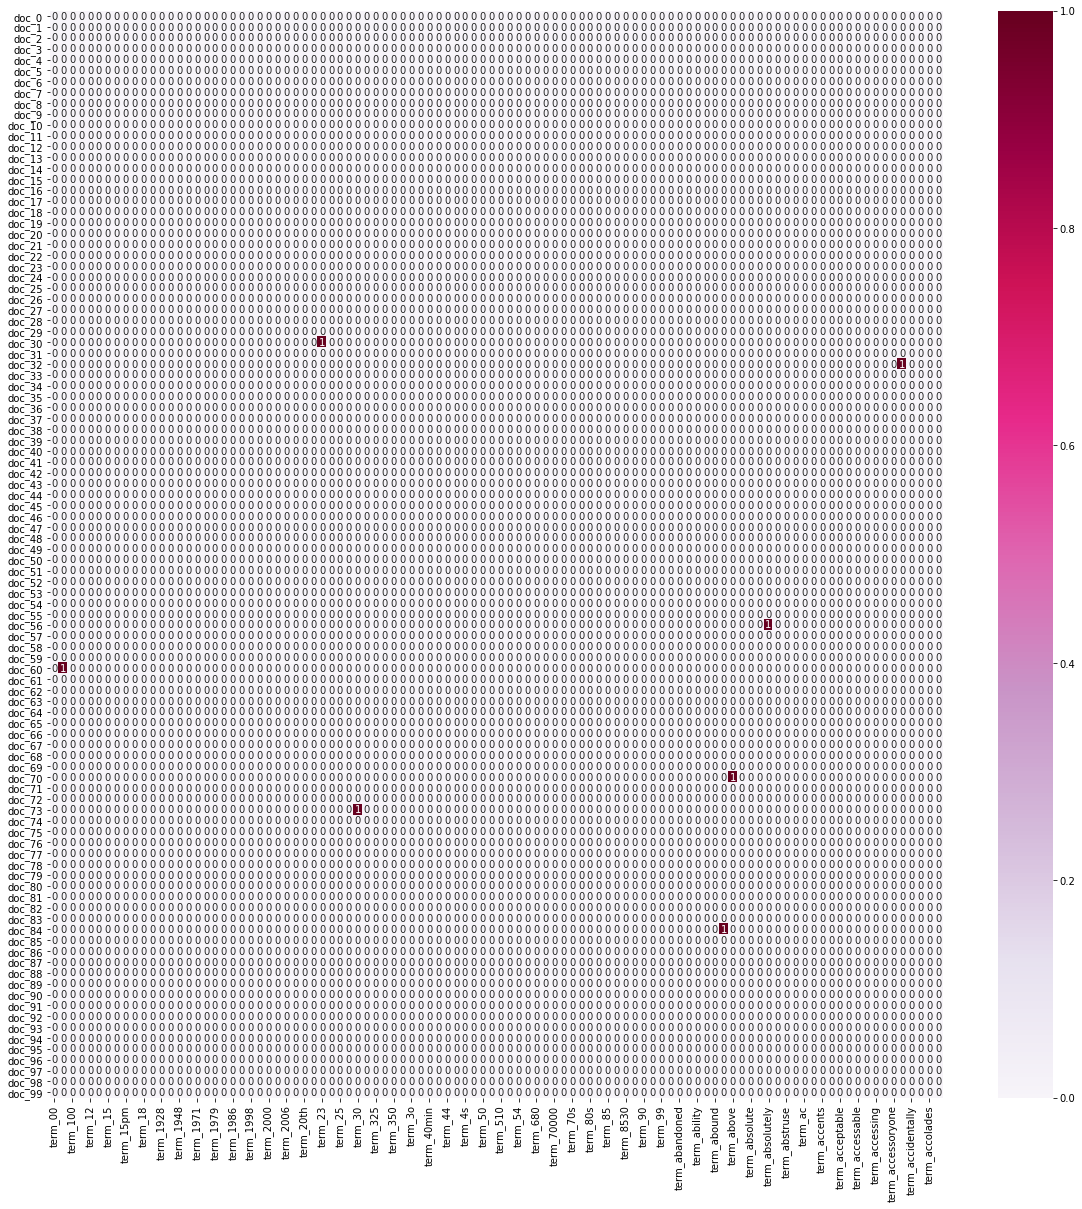

In [79]:
#I made this visualization in order to use seaborn and to look part of the original dataframe
#I found the term "00" has a frequency of 0 from the document with index 0 to the 99th
import seaborn as sns

# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X_labelled.index)[0:100]]
plot_z = X_counts[0:100, 0:100].toarray()

#we got a visualization from a little piece of the original
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(20, 20))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

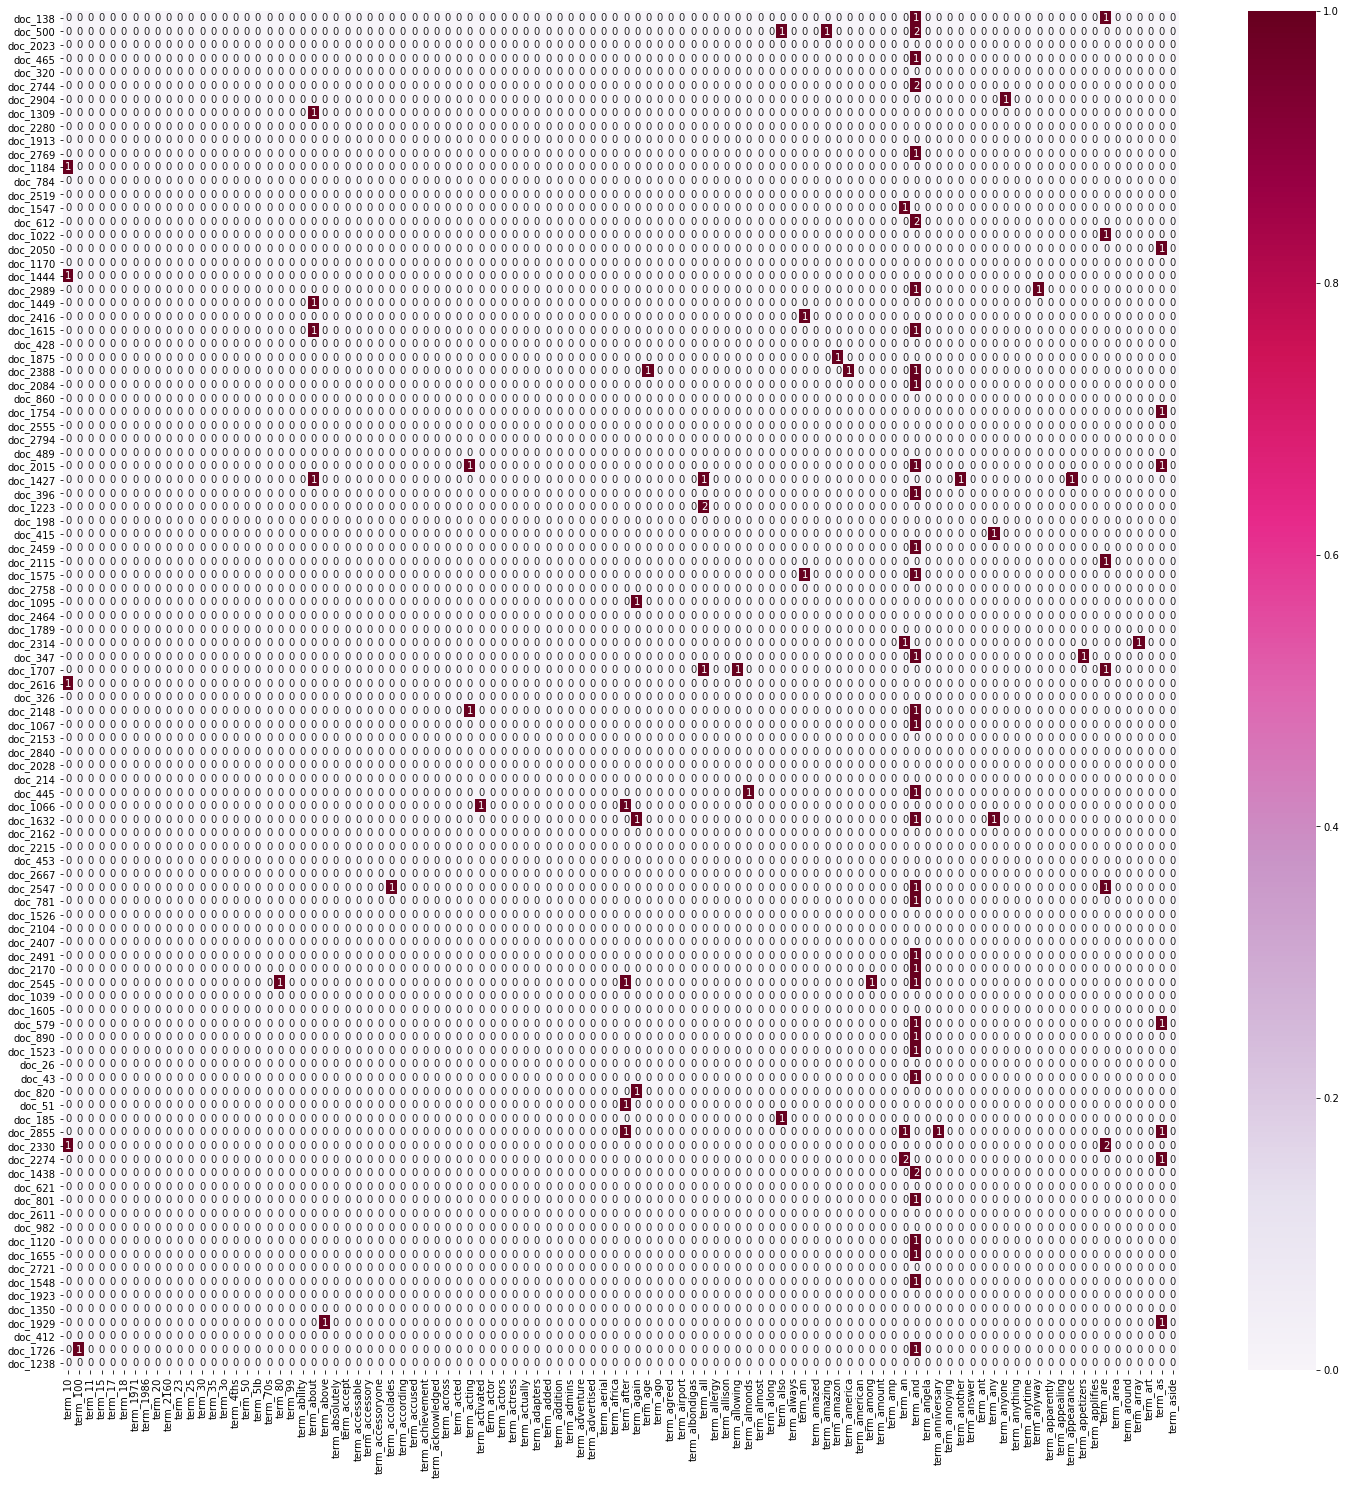

In [80]:
#I made this visualization to use seaborn and to look part of the dataframe's sample
#I found the term "as" has a frequency of 2 in the document 2633
#Also, I found the term "all" has a frequency of 2 in the document 872
count_vect_sample = CountVectorizer()
X_counts_sample = count_vect_sample.fit_transform(X_sample.sentence)
plot_x_sample = ["term_"+str(i) for i in count_vect_sample.get_feature_names()[0:100]]
plot_y_sample = ["doc_"+ str(i) for i in list(X_sample.index)[0:100]]
plot_z_sample = X_counts_sample[0:100, 0:100].toarray()
df_todraw_sample = pd.DataFrame(plot_z_sample, columns = plot_x_sample, index = plot_y_sample)
#I increased the size to have better visualization.
plt.subplots(figsize=(25, 25))
ax_sample = sns.heatmap(df_todraw_sample,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### Dimensionality Reduction

In [81]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
X_reduced.shape

(2966, 2)

In [82]:
score

['Negative', 'Positive']

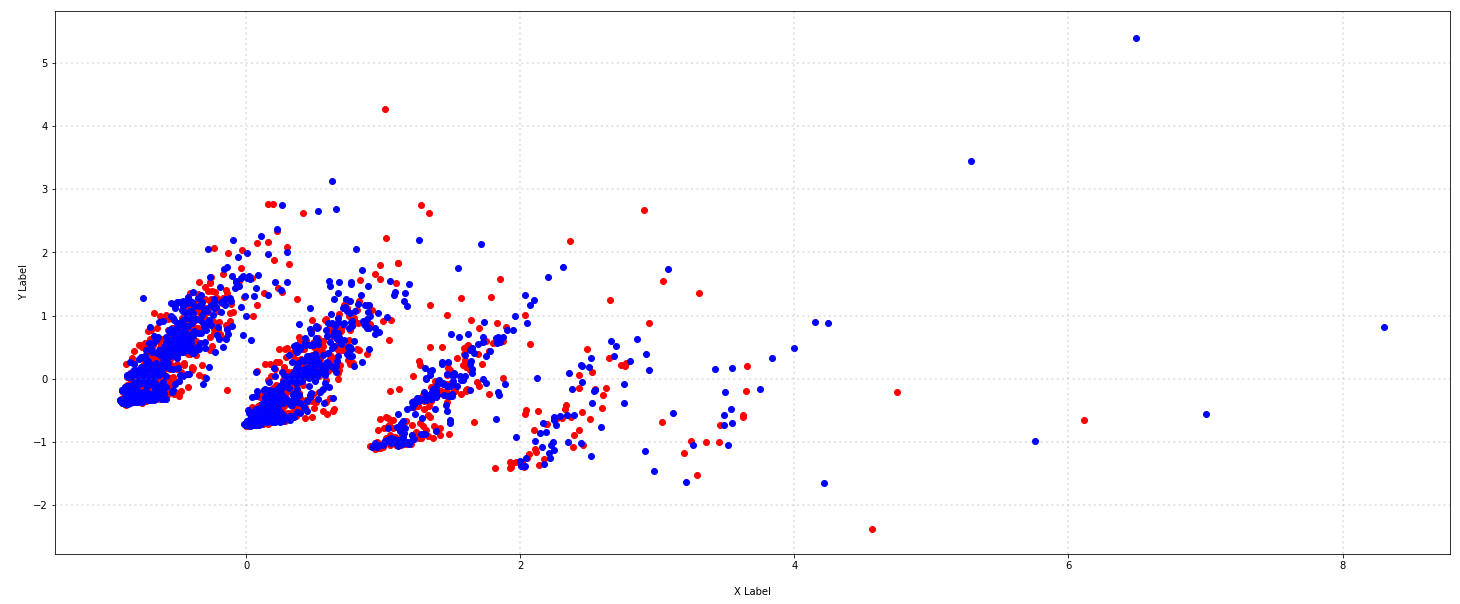

In [83]:
#the next visualization show us that the data could be sparsed.
#Also, the visualization show us that could exists some relationship between some terms
col = ['red', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, score_t in zip(col, score):
    xs = X_reduced[X_labelled['score_name'] == score_t].T[0]
    ys = X_reduced[X_labelled['score_name'] == score_t].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

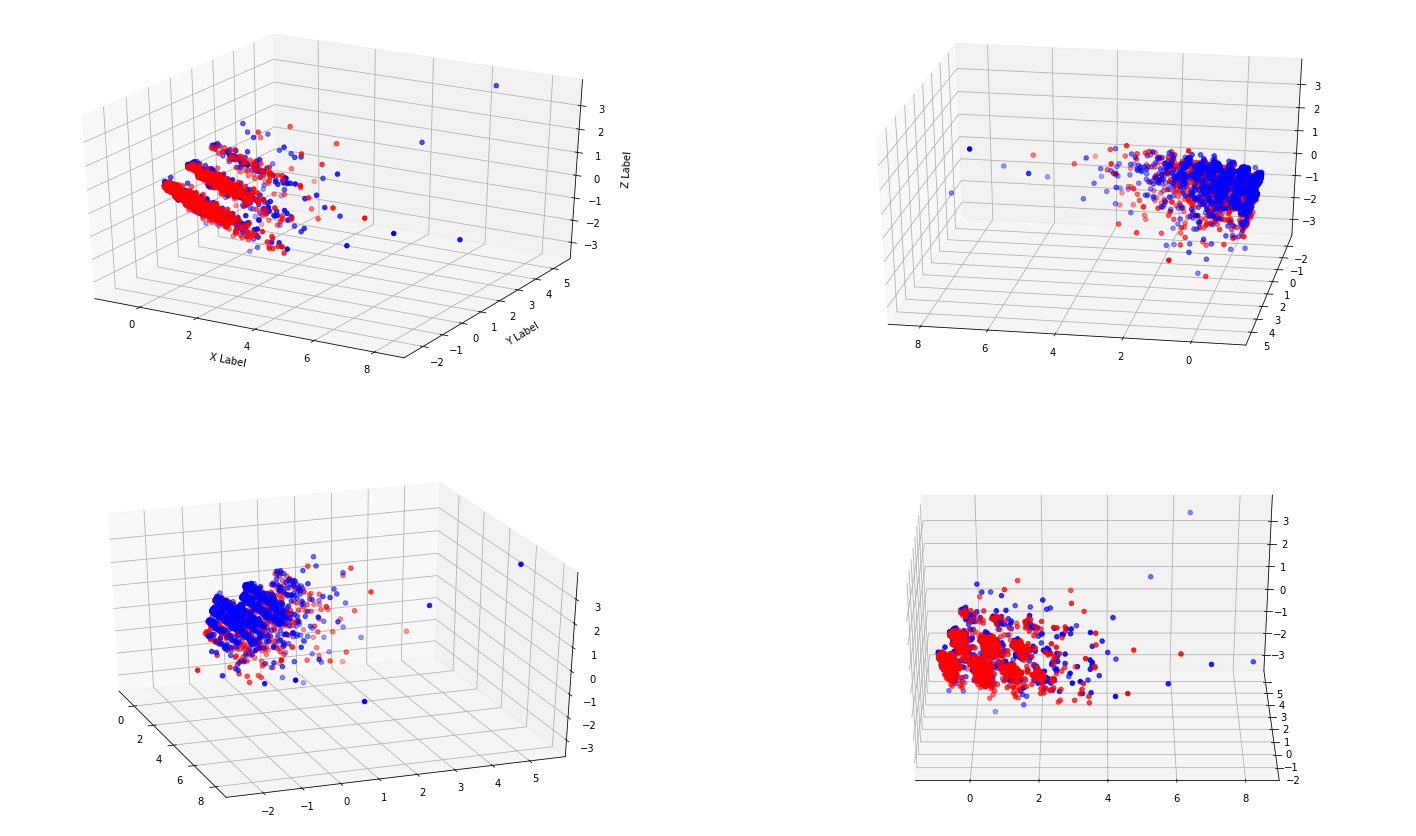

In [84]:
#the next visualization show us that the data could be sparsed.
#Also, the visualization show us that could exists some relationship between some terms
from mpl_toolkits.mplot3d import Axes3D
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

fig = plt.figure(figsize = (25,15))
ax1h = fig.add_subplot(221, projection='3d')
ax2h = fig.add_subplot(222, projection='3d')
ax3h = fig.add_subplot(223, projection='3d')
ax4h = fig.add_subplot(224, projection='3d')

for c, score_t in zip(col, score):
    xs = X_reduced[X_labelled['score_name'] == score_t].T[0]
    ys = X_reduced[X_labelled['score_name'] == score_t].T[1]
    zs = X_reduced[X_labelled['score_name'] == score_t].T[2]
   
    ax1h.scatter(xs, ys, zs, c=c, marker='o')
    ax2h.scatter(xs, ys, zs, c=c, marker='o')
    ax3h.scatter(xs, ys, zs, c=c, marker='o')
    ax4h.scatter(xs, ys, zs, c=c, marker='o')

ax1h.set_xlabel('\nX Label')
ax1h.set_ylabel('\nY Label')
ax1h.set_zlabel('\nZ Label')


ax2h.view_init(30, 100)
ax3h.view_init(30, 340)
ax4h.view_init(30, 270)


plt.show()

In [85]:
#in the next visualization, I wanted to use iplot the look the data in a better way
#it show us that the data could be sparsed.
#Also, the visualization show us that could exists some relationship between some terms
def get_trace2(X_pca, data, category, color):
    """ Build trace for plotly chart based on category """
    trace = go.Scatter3d(
        x=X_pca[data.apply(lambda x: True if x==category else False), 0],
        y=X_pca[data.apply(lambda x: True if x==category else False),1],
        z=X_pca[data.apply(lambda x: True if x==category else False),2],
        mode='markers',
        marker=dict(
            size=4,
            line=dict(
                color=color,
                width=0.2
            ),
            opacity=0.8
        ),
        name = category,
        text=data[data.apply(lambda x: True if x==category else False).tolist()]
    )
    return trace

import plotly as ptly1
import plotly.plotly as ptly
import math
ptly1.tools.set_credentials_file(username='Jonaoliv', api_key='eIFDyiWhO0sEmc0uwUI9')
import plotly.graph_objs as go

trace1 = get_trace2(X_reduced, X_labelled["score_name"], "Positive", "blue")
trace2 = get_trace2(X_reduced, X_labelled["score_name"], "Negative", "red")
data = [trace1, trace2]

layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)


fig = go.Figure(data=data, layout=layout)
ptly.iplot(fig)
#there is correlation between features but there is sparcity

### Atribute Transformation / Aggregation section

In [86]:
import numpy as np
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies[0]

1

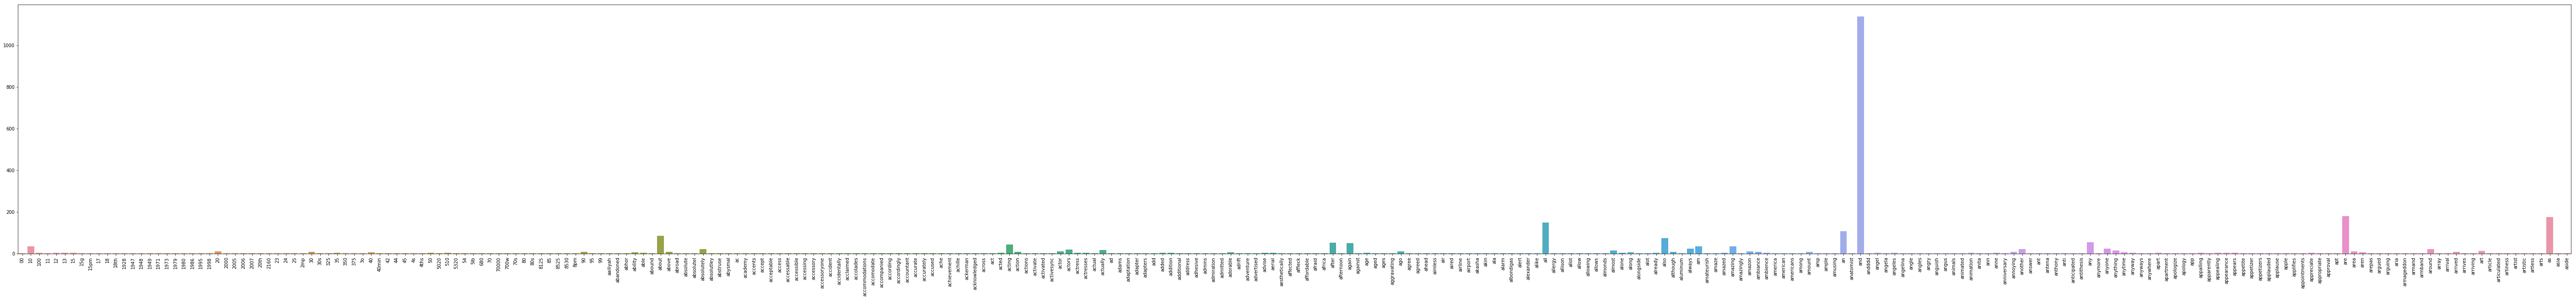

In [87]:
#we wanted to see the frenquency of the words
#the term "the" has the most frequency
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [88]:
#in order to see in a better way the other frequencies I used logarithms in these visualization
#I found other three words with a high frequency: thats, and, italian.
term_frequencies_log = [math.log(i) for i in term_frequencies]
word_list = [count_vect.get_feature_names(), term_frequencies_log]

trace1 = {"x": list(word_list[0]),"y": list(word_list[1]),"type": "bar"}
data = go.Data([trace1])

layout = {"title": "Frequency logs","yaxis": {"title": "Frequency"}}

fig = go.Figure(data = data, layout=layout)

ptly.iplot(fig)

C:\Anaconda\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [89]:
#I used only 130 term to avoid way too much time. One little sample
#another term used frequently is "about"
term_frequencies_log = [math.log(i) for i in term_frequencies[:130]]
word_list = [count_vect.get_feature_names(), term_frequencies_log]

trace1 = {"x": list(word_list[0]),"y": list(word_list[1]),"type": "bar"}
data = go.Data([trace1])

layout = {"title": "Only 130 terms","yaxis": {"title": "Frequency"}}

fig = go.Figure(data = data, layout=layout)

ptly.iplot(fig)

C:\Anaconda\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [90]:
#In this visualization I sorted them in a descending way to get the most used values
#the five term more used are: the, is, it, to, and.
X_tail = pd.DataFrame.from_dict(count_vect.get_feature_names())
X_tail["term_frequencies_log"] = [math.log(i) for i in term_frequencies]
X_tail = X_tail.sort_values("term_frequencies_log",ascending=False)

traceLongTail = {"x": list(X_tail[0]),"y": list(X_tail.term_frequencies_log),"type": "bar"}
data = go.Data([traceLongTail])
layout = {"title": "Long Tail graphic","yaxis": {"title": "Frequency"}}

fig = go.Figure(data = data, layout=layout)
ptly.iplot(fig)

C:\Anaconda\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




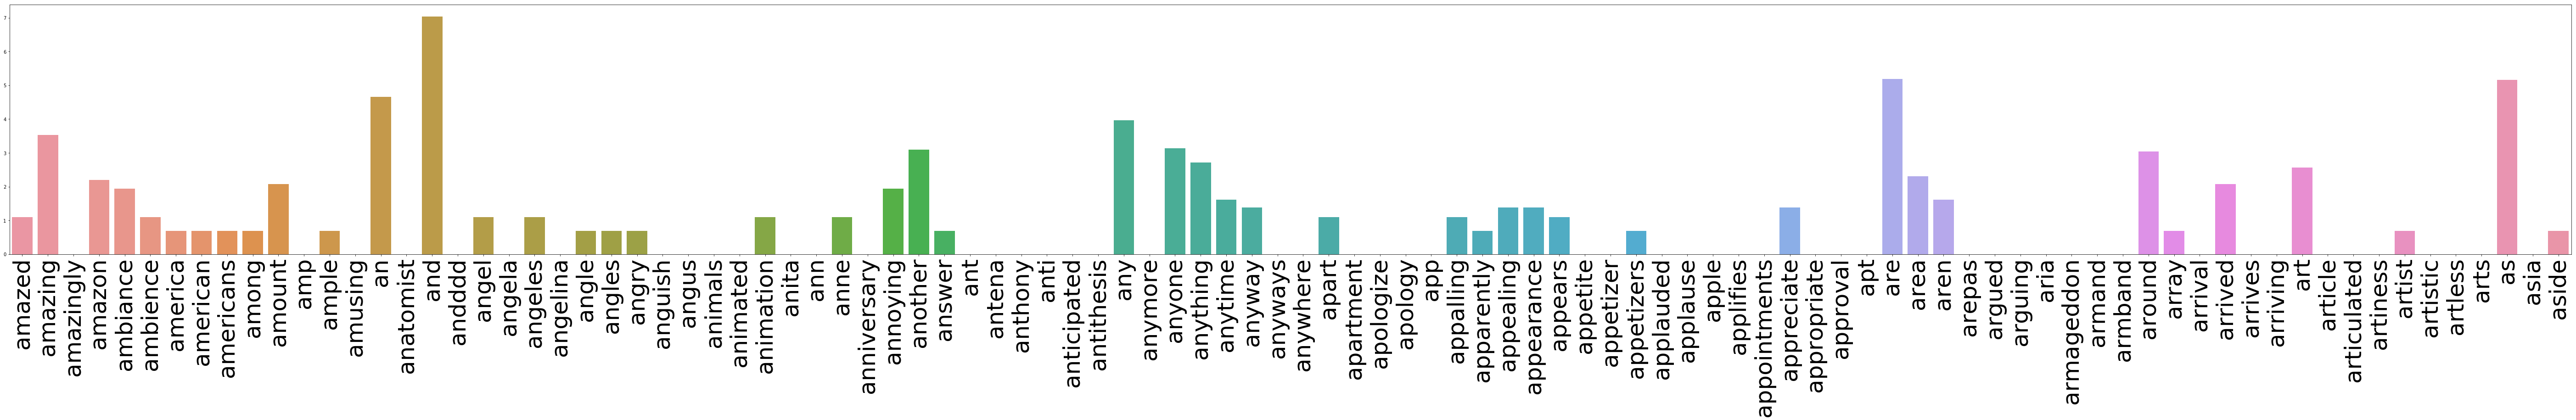

In [91]:
#in order to see in a better way the other frequencies I used logarithms in these visualization, also I used seaborn
#I found the term "and" with more frequency than the term "an"
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[200:300],
                y=term_frequencies_log[200:300])
g.set_xticklabels(count_vect.get_feature_names()[200:300], rotation = 90, fontsize = 50);

In [92]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X_labelled.score)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [93]:
mlb.classes_

array([0, 1], dtype=int64)

In [94]:
X_labelled['bin_category'] = mlb.transform(X_labelled['score']).tolist()
X_labelled[0:10]

,sentence,score,score_name,unigrams,bin_category
0,Wow... Loved this place.,1,Positive,"[Wow, ..., Loved, this, place, .]",[1]
1,Crust is not good.,0,Negative,"[Crust, is, not, good, .]",[0]
2,Not tasty and the texture was just nasty.,0,Negative,"[Not, tasty, and, the, texture, was, just, nas...",[0]
3,Stopped by during the late May bank holiday of...,1,Positive,"[Stopped, by, during, the, late, May, bank, ho...",[1]
4,The selection on the menu was great and so wer...,1,Positive,"[The, selection, on, the, menu, was, great, an...",[1]
5,Now I am getting angry and I want my damn pho.,0,Negative,"[Now, I, am, getting, angry, and, I, want, my,...",[0]
6,Honeslty it didn't taste THAT fresh.),0,Negative,"[Honeslty, it, did, n't, taste, THAT, fresh, ....",[0]
7,The potatoes were like rubber and you could te...,0,Negative,"[The, potatoes, were, like, rubber, and, you, ...",[0]
8,The fries were great too.,1,Positive,"[The, fries, were, great, too, .]",[1]
9,A great touch.,1,Positive,"[A, great, touch, .]",[1]


# 40 % part assignment

## New data visualizations

Line Chart

This visualization is in order to look interesting differences between positive and negative frequencies. For example: I found they used most of the time the term "literally" only in positive opinions. However, they used the terms "juice" and "despite" in more negative opinions than positive opinions.

In [95]:
plot_x_nv = ["term_"+str(i) for i in count_vect_sample.get_feature_names()]

#we are going to use two categories [positive ,negative]
indexes_positive = []
indexes_negative = []
#we will find positive and negative rows
for idx, row in enumerate(X_labelled.itertuples(index=False)):
    if row.score == 1:
        indexes_positive.append(idx)
    else:
        indexes_negative.append(idx)
        
#I will count positive frequencies and negative frenquencies to have two categories 
term_frequencies_positive = np.asarray(X_counts[indexes_positive].sum(axis=0))[0]
term_frequencies_negative = np.asarray(X_counts[indexes_negative].sum(axis=0))[0]

traceP = go.Scatter(
    x = plot_x_nv,
    y = term_frequencies_positive,
    mode = 'lines+markers',
    name = 'Positive frequencies'
)

traceN = go.Scatter(
    x = plot_x_nv,
    y = term_frequencies_negative,
    mode = 'lines+markers',
    name = 'Negative frequencies'
)


data = [traceP,traceN]

ptly.iplot(data)

Filled Area chart

In order to look it in the same way, like we did in the home part, also with a goal of look more differences between negative and positive opinions. I used logarithm of positive and negative term frequencies. In addition, I ordered the features in a descending way, it looked as a longtail. However, I couldn't find anything in differences. They look too similar. 

In [96]:
#version longtail Filled Area Plots from the previous one with logarithm
#we use log(i + 1) because log(0) produce a domain error

X_tail_po = pd.DataFrame.from_dict(count_vect.get_feature_names())
X_tail_po["term_frequencies_log"] = [math.log(i+1) for i in term_frequencies_positive]
X_tail_po = X_tail.sort_values("term_frequencies_log",ascending=False)

X_tail_ne = pd.DataFrame.from_dict(count_vect.get_feature_names())
X_tail_ne["term_frequencies_log"] = [math.log(i+1) for i in term_frequencies_negative]
X_tail_ne = X_tail.sort_values("term_frequencies_log",ascending=False)

traceP = go.Scatter(
    x = X_tail_po[0],
    y = X_tail_po["term_frequencies_log"],
    mode = 'lines',
    name = 'Positive frequencies',
    fill='tonexty'
)

traceN = go.Scatter(
    x = X_tail_ne[0],
    y = X_tail_ne["term_frequencies_log"],
    mode = 'lines',
    name = 'Negative frequencies',
    fill='tonexty'
)


data = [traceP,traceN]

ptly.iplot(data)

Stacked bar chart

I utilized it because I wanted to use seaborn to find differences in a piece of the data. The blue bar are the total frequency, and the red bar is the frequency of negative opinions. The difference between them are the positive opinions. With this chart I found the term "acting" more utilized on negative opinions than positive, but the term "actor" is more used in positive opinions.

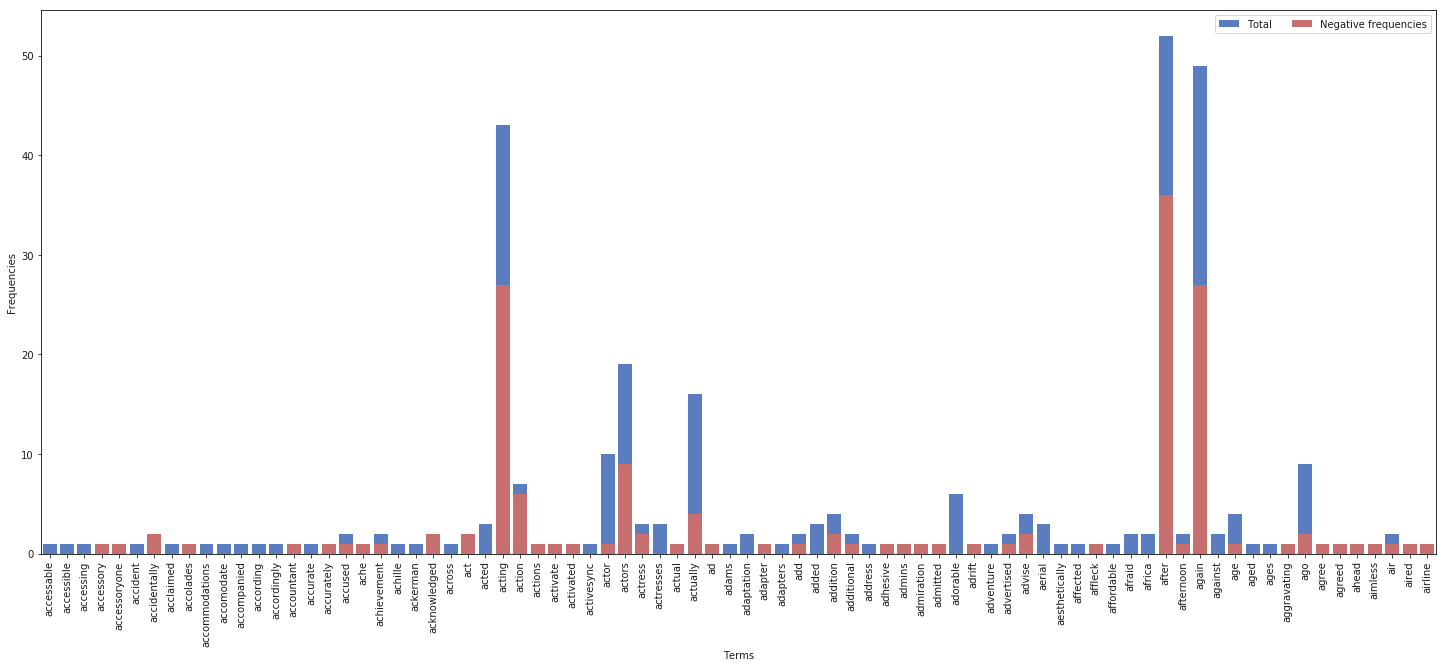

In [97]:
#comparing between total frequencies and negative opinion frequencies

import matplotlib.pyplot as plt
import seaborn as sns

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

fig = plt.figure(figsize = (25,10))
ax2 = fig.subplots()

sns.set_color_codes("muted")

x_feature_names_stacked_bar = ["term_"+str(i) for i in count_vect_sample.get_feature_names()[90:170]]
sns.barplot(x=x_feature_names_stacked_bar, y=term_frequencies[90:170],color="b",label="Total")

ax = sns.barplot(x=x_feature_names_stacked_bar, y=term_frequencies_negative[90:170],color="r",label="Negative frequencies")
ax.set_xticklabels(count_vect.get_feature_names()[90:170], rotation = 90)

ax2.legend(ncol=2, loc="upper right", frameon=True)
ax2.set(ylabel="Frequencies", xlabel="Terms")

plt.show()

Bubble Chart

To see relation between three variables: positive frequency, negative frequency and size. 
In the case of size is a variable used to classify by category the total frequency. Size is the total frequency in four categories: blue, green, yellow, red. Also, it change in wide in according to the category.I found than in addition to the word  "the", other common words in english are "and", "as" and "its". Futhermore, I found the term "but" more used in negative opinions.

In [98]:
def get_colot_value(frequency):
    """ print a color in according to the frequency"""
    color = 'rgb(93, 164, 214)'
    if frequency > 10:
        color = 'rgb(44, 160, 101)'
    if frequency > 100:
        color = 'rgb(255, 144, 14)' 
    if frequency > 150:
        color = 'rgb(255, 65, 54)'
    return color

In [99]:
def get_size_value(frequency):
    """ print a size in according to the frequency"""
    size = 10
    if frequency > 10:
        size = 10
    if frequency > 100:
        size = 15  
    if frequency > 150:
        size = 25
    return size

In [100]:
import plotly.plotly as py2

term_frequencies_colors = [get_colot_value(i) for i in term_frequencies]
term_frequencies_size = [get_size_value(i) for i in term_frequencies]
data = [
    {
        'x': term_frequencies_positive[0:700],
        'y': term_frequencies_negative[0:700],
        'text':count_vect.get_feature_names()[0:700],
        'mode': 'markers',
        'marker': {
            'color': term_frequencies_colors[0:700],
            'size': term_frequencies_size[0:700]
        }
    }
]


layout = go.Layout(
    title='Positive vs Negative Frequency',
    xaxis=dict(
        title='Positive Frenquency'
    ),
    yaxis=dict(
        title='Negative Frenquency'
    )
)

fig = go.Figure(data=data, layout=layout)

py2.iplot(fig)

## Generated TF-IDF features from the tokens of each text. 

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X_labelled.sentence)
print(vectorizer.get_feature_names())

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17', '18', '18th', '1928', '1947', '1948', '1949', '1971', '1973', '1979', '1980', '1986', '1995', '1998', '20', '2000', '2005', '2006', '2007', '20th', '2160', '23', '24', '25', '2mp', '30', '30s', '325', '35', '350', '375', '3o', '40', '40min', '42', '44', '45', '4s', '4ths', '50', '5020', '510', '5320', '54', '5lb', '680', '70', '70000', '700w', '70s', '80', '80s', '8125', '85', '8525', '8530', '8pm', '90', '95', '99', 'aailiyah', 'abandoned', 'abhor', 'ability', 'able', 'abound', 'about', 'above', 'abroad', 'absolute', 'absolutel', 'absolutely', 'absolutley', 'abstruse', 'abysmal', 'ac', 'academy', 'accents', 'accept', 'acceptable', 'access', 'accessable', 'accessible', 'accessing', 'accessory', 'accessoryone', 'accident', 'accidentally', 'acclaimed', 'accolades', 'accommodations', 'accomodate', 'accompanied', 'according', 'accordingly', 'accountant', 'accurate', 'accurately', 'accused', 'ache', 'achievement', 'achille', '

In [102]:
X_tfidf[0:5,0:50].toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

## Similarity 

### Cosine similarity

In [103]:
def get_anwser_cos_sim(cos_sim):
    """ print a string to explain result"""
    cos_sim_anwser = "Cosine Similarity is "+str(cos_sim)+". Nothing to say"
    if cos_sim == 0.0:
        cos_sim_anwser = "Cosine Similarity is "+str(cos_sim)+". They not share any terms"
    if cos_sim == 1.0:
        cos_sim_anwser = "Cosine Similarity is "+str(cos_sim)+". They are the same"    
    if cos_sim >0.0 and cos_sim < 0.5:
        cos_sim_anwser = "Cosine Similarity is "+str(cos_sim)+". They share some terms"
    if cos_sim >=0.5 and cos_sim < 1.0:
        cos_sim_anwser = "Cosine Similarity is "+str(cos_sim)+". They share most of the half of terms"
    return cos_sim_anwser

In [104]:
from sklearn.metrics.pairwise import cosine_similarity
#in order to get random sentences I will import random module
import random
iRandomSentenceIndex1 = random.randint(0,3000)
iRandomSentenceIndex2 = random.randint(0,3000)
iRandomSentenceIndex3 = random.randint(0,3000)
iRandomSentenceIndex4 = random.randint(0,3000)
iRandomSentenceIndex5 = random.randint(0,3000)
iRandomSentenceIndex6 = random.randint(0,3000)
#I'm going to compare sentence 1 with sentence 2, sentence 3 with sentence 4
print(iRandomSentenceIndex1)
print(iRandomSentenceIndex2)
print(iRandomSentenceIndex3)
print(iRandomSentenceIndex4)
print(iRandomSentenceIndex5)
print(iRandomSentenceIndex6)

2715
1198
330
1314
1005
2292


In [105]:
print("TF-IDF features:\n")
print("First sentence "+str(iRandomSentenceIndex1))
print("Second sentence "+str(iRandomSentenceIndex2))
result = cosine_similarity(X_tfidf[iRandomSentenceIndex1].toarray(), X_tfidf[iRandomSentenceIndex2].toarray())
print(get_anwser_cos_sim(result[0][0]))

print("\nCount Vectorizer:\n")
print("First sentence "+str(iRandomSentenceIndex1))
print("Second sentence "+str(iRandomSentenceIndex2))
result = cosine_similarity(X_counts[iRandomSentenceIndex1].toarray(), X_counts[iRandomSentenceIndex2].toarray())
print(get_anwser_cos_sim(result[0][0]))

TF-IDF features:

First sentence 2715
Second sentence 1198
Cosine Similarity is 0.010143413743336131. They share some terms

Count Vectorizer:

First sentence 2715
Second sentence 1198
Cosine Similarity is 0.051434449987363975. They share some terms


In [106]:
print("TF-IDF features:\n")
print("First sentence "+str(iRandomSentenceIndex3))
print("Second sentence "+str(iRandomSentenceIndex4))
result = cosine_similarity(X_tfidf[iRandomSentenceIndex3].toarray(), X_tfidf[iRandomSentenceIndex4].toarray())
print(get_anwser_cos_sim(result[0][0]))

print("\nCount Vectorizer:\n")
print("First sentence "+str(iRandomSentenceIndex3))
print("Second sentence "+str(iRandomSentenceIndex4))
result = cosine_similarity(X_counts[iRandomSentenceIndex3].toarray(), X_counts[iRandomSentenceIndex4].toarray())
print(get_anwser_cos_sim(result[0][0]))

TF-IDF features:

First sentence 330
Second sentence 1314
Cosine Similarity is 0.0. They not share any terms

Count Vectorizer:

First sentence 330
Second sentence 1314
Cosine Similarity is 0.0. They not share any terms


In [107]:
print("TF-IDF features:\n")
print("First sentence "+str(iRandomSentenceIndex5))
print("Second sentence "+str(iRandomSentenceIndex6))
result = cosine_similarity(X_tfidf[iRandomSentenceIndex5].toarray(), X_tfidf[iRandomSentenceIndex6].toarray())
print(get_anwser_cos_sim(result[0][0]))

print("\nCount Vectorizer:\n")
print("First sentence "+str(iRandomSentenceIndex5))
print("Second sentence "+str(iRandomSentenceIndex6))
result = cosine_similarity(X_counts[iRandomSentenceIndex5].toarray(), X_counts[iRandomSentenceIndex6].toarray())
print(get_anwser_cos_sim(result[0][0]))

TF-IDF features:

First sentence 1005
Second sentence 2292
Cosine Similarity is 0.0. They not share any terms

Count Vectorizer:

First sentence 1005
Second sentence 2292
Cosine Similarity is 0.0. They not share any terms


### Pearson's correlation coefficient ###

In [108]:
#I prepare module and function
from scipy.stats.stats import pearsonr  

def get_anwser_pearson_coeff(pearson_coeff):
    """ print a string to explain result"""
    pearson_coeff_anwser = "The Pearson's correlation coeficient is "+str(pearson_coeff)+". Nothing to say"
    if pearson_coeff == 0.0:
        pearson_coeff_anwser = "Cosine Similarity is "+str(pearson_coeff)+". They don't have correlation"  
    if pearson_coeff >0.0:
        pearson_coeff_anwser = "The Pearson's correlation coeficient is "+str(pearson_coeff)+". They have a positive correlation"
    if pearson_coeff <0.0:
        pearson_coeff_anwser = "The Pearson's correlation coeficient is "+str(pearson_coeff)+". They have a negative correlation"
    return pearson_coeff_anwser

In [109]:
myarray1 = np.asarray(X_tfidf[iRandomSentenceIndex1].toarray()[0])
myarray2 = np.asarray(X_tfidf[iRandomSentenceIndex2].toarray()[0])
print("TF-IDF features:\n")
print("First sentence "+str(iRandomSentenceIndex1))
print("Second sentence "+str(iRandomSentenceIndex2))
print(get_anwser_pearson_coeff(pearsonr(myarray1, myarray2)[0]))

myarray1 = np.asarray(X_counts[iRandomSentenceIndex1].toarray()[0])
myarray2 = np.asarray(X_counts[iRandomSentenceIndex2].toarray()[0])
print("\nCount Vectorizer:\n")
print("First sentence "+str(iRandomSentenceIndex1))
print("Second sentence "+str(iRandomSentenceIndex2))
print(get_anwser_pearson_coeff(pearsonr(myarray1, myarray2)[0]))

TF-IDF features:

First sentence 2715
Second sentence 1198
The Pearson's correlation coeficient is 0.0071998611810336005. They have a positive correlation

Count Vectorizer:

First sentence 2715
Second sentence 1198
The Pearson's correlation coeficient is 0.04838049556438829. They have a positive correlation


In [110]:
myarray1 = np.asarray(X_tfidf[iRandomSentenceIndex3].toarray()[0])
myarray2 = np.asarray(X_tfidf[iRandomSentenceIndex4].toarray()[0])
print("TF-IDF features:\n")
print("First sentence "+str(iRandomSentenceIndex3))
print("Second sentence "+str(iRandomSentenceIndex4))
print(get_anwser_pearson_coeff(pearsonr(myarray1, myarray2)[0]))

myarray1 = np.asarray(X_counts[iRandomSentenceIndex3].toarray()[0])
myarray2 = np.asarray(X_counts[iRandomSentenceIndex4].toarray()[0])
print("\nCount Vectorizer:\n")
print("First sentence "+str(iRandomSentenceIndex3))
print("Second sentence "+str(iRandomSentenceIndex4))
print(get_anwser_pearson_coeff(pearsonr(myarray1, myarray2)[0]))

TF-IDF features:

First sentence 330
Second sentence 1314
The Pearson's correlation coeficient is -0.0015805929244928187. They have a negative correlation

Count Vectorizer:

First sentence 330
Second sentence 1314
The Pearson's correlation coeficient is -0.001737933939103891. They have a negative correlation


In [111]:
myarray1 = np.asarray(X_tfidf[iRandomSentenceIndex5].toarray()[0])
myarray2 = np.asarray(X_tfidf[iRandomSentenceIndex6].toarray()[0])
print("TF-IDF features:\n")
print("First sentence "+str(iRandomSentenceIndex5))
print("Second sentence "+str(iRandomSentenceIndex6))
print(get_anwser_pearson_coeff(pearsonr(myarray1, myarray2)[0]))

myarray1 = np.asarray(X_counts[iRandomSentenceIndex5].toarray()[0])
myarray2 = np.asarray(X_counts[iRandomSentenceIndex6].toarray()[0])
print("\nCount Vectorizer:\n")
print("First sentence "+str(iRandomSentenceIndex5))
print("Second sentence "+str(iRandomSentenceIndex6))
print(get_anwser_pearson_coeff(pearsonr(myarray1, myarray2)[0]))

TF-IDF features:

First sentence 1005
Second sentence 2292
The Pearson's correlation coeficient is -0.0005087718001520299. They have a negative correlation

Count Vectorizer:

First sentence 1005
Second sentence 2292
The Pearson's correlation coeficient is -0.0005487829216113186. They have a negative correlation


### Euclidean Distance

In [112]:
from sklearn.metrics.pairwise import euclidean_distances

In [113]:
print("TF-IDF features:\n")
print("First sentence "+str(iRandomSentenceIndex1))
print("Second sentence "+str(iRandomSentenceIndex2))
distance_euclidean = euclidean_distances(X_tfidf[iRandomSentenceIndex1].toarray(), X_tfidf[iRandomSentenceIndex2].toarray())
print("The distance between the document "+str(iRandomSentenceIndex1)+" and the document "+str(iRandomSentenceIndex2)+" is "+str(distance_euclidean[0][0]))

print("\nCount Vectorizer:\n")
print("First sentence "+str(iRandomSentenceIndex1))
print("Second sentence "+str(iRandomSentenceIndex2))
distance_euclidean = euclidean_distances(X_counts[iRandomSentenceIndex1].toarray(), X_counts[iRandomSentenceIndex2].toarray())
print("The distance between the document "+str(iRandomSentenceIndex1)+" and the document "+str(iRandomSentenceIndex2)+" is "+str(distance_euclidean[0][0]))

TF-IDF features:

First sentence 2715
Second sentence 1198
The distance between the document 2715 and the document 1198 is 1.4070228045462971

Count Vectorizer:

First sentence 2715
Second sentence 1198
The distance between the document 2715 and the document 1198 is 6.244997998398398


In [114]:
print("TF-IDF features:\n")
print("First sentence "+str(iRandomSentenceIndex3))
print("Second sentence "+str(iRandomSentenceIndex4))
distance_euclidean = euclidean_distances(X_tfidf[iRandomSentenceIndex3].toarray(), X_tfidf[iRandomSentenceIndex4].toarray())
print("The distance between the document "+str(iRandomSentenceIndex3)+" and the document "+str(iRandomSentenceIndex4)+" is "+str(distance_euclidean[0][0]))

print("\nCount Vectorizer:\n")
print("First sentence "+str(iRandomSentenceIndex3))
print("Second sentence "+str(iRandomSentenceIndex4))
distance_euclidean = euclidean_distances(X_counts[iRandomSentenceIndex3].toarray(), X_counts[iRandomSentenceIndex4].toarray())
print("The distance between the document "+str(iRandomSentenceIndex3)+" and the document "+str(iRandomSentenceIndex4)+" is "+str(distance_euclidean[0][0]))

TF-IDF features:

First sentence 330
Second sentence 1314
The distance between the document 330 and the document 1314 is 1.4142135623730951

Count Vectorizer:

First sentence 330
Second sentence 1314
The distance between the document 330 and the document 1314 is 4.58257569495584


In [115]:
euclidean_distances(X_tfidf[iRandomSentenceIndex5].toarray(), X_tfidf[iRandomSentenceIndex6].toarray())
print("TF-IDF features:\n")
print("First sentence "+str(iRandomSentenceIndex5))
print("Second sentence "+str(iRandomSentenceIndex6))
distance_euclidean = euclidean_distances(X_tfidf[iRandomSentenceIndex5].toarray(), X_tfidf[iRandomSentenceIndex6].toarray())
print("The distance between the document "+str(iRandomSentenceIndex5)+" and the document "+str(iRandomSentenceIndex6)+" is "+str(distance_euclidean[0][0]))

print("\nCount Vectorizer:\n")
print("First sentence "+str(iRandomSentenceIndex5))
print("Second sentence "+str(iRandomSentenceIndex6))
distance_euclidean = euclidean_distances(X_counts[iRandomSentenceIndex5].toarray(), X_counts[iRandomSentenceIndex6].toarray())
print("The distance between the document "+str(iRandomSentenceIndex5)+" and the document "+str(iRandomSentenceIndex6)+" is "+str(distance_euclidean[0][0]))

TF-IDF features:

First sentence 1005
Second sentence 2292
The distance between the document 1005 and the document 2292 is 1.4142135623730951

Count Vectorizer:

First sentence 1005
Second sentence 2292
The distance between the document 1005 and the document 2292 is 2.449489742783178


## Naive Bayes classifier 

In [116]:
X_labelled[0:20]

,sentence,score,score_name,unigrams,bin_category
0,Wow... Loved this place.,1,Positive,"[Wow, ..., Loved, this, place, .]",[1]
1,Crust is not good.,0,Negative,"[Crust, is, not, good, .]",[0]
2,Not tasty and the texture was just nasty.,0,Negative,"[Not, tasty, and, the, texture, was, just, nas...",[0]
3,Stopped by during the late May bank holiday of...,1,Positive,"[Stopped, by, during, the, late, May, bank, ho...",[1]
4,The selection on the menu was great and so wer...,1,Positive,"[The, selection, on, the, menu, was, great, an...",[1]
5,Now I am getting angry and I want my damn pho.,0,Negative,"[Now, I, am, getting, angry, and, I, want, my,...",[0]
6,Honeslty it didn't taste THAT fresh.),0,Negative,"[Honeslty, it, did, n't, taste, THAT, fresh, ....",[0]
7,The potatoes were like rubber and you could te...,0,Negative,"[The, potatoes, were, like, rubber, and, you, ...",[0]
8,The fries were great too.,1,Positive,"[The, fries, were, great, too, .]",[1]
9,A great touch.,1,Positive,"[A, great, touch, .]",[1]


### TF IDF 

In [117]:
#we are going to use two categories [positive ,negative]
indexes_positive = []
indexes_negative = []
#we will find positive and negative rows
for idx, row in enumerate(X_labelled.itertuples(index=False)):
    if row.score == 1:
        indexes_positive.append(idx)
    else:
        indexes_negative.append(idx)
    

In [118]:
indexes_positive

[0,
 3,
 4,
 8,
 9,
 10,
 13,
 16,
 21,
 22,
 23,
 24,
 25,
 27,
 30,
 32,
 34,
 35,
 36,
 38,
 40,
 43,
 45,
 47,
 48,
 49,
 50,
 51,
 52,
 54,
 55,
 58,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 69,
 70,
 71,
 77,
 78,
 83,
 85,
 87,
 88,
 89,
 91,
 93,
 96,
 97,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 112,
 113,
 114,
 115,
 122,
 123,
 124,
 127,
 129,
 131,
 132,
 134,
 135,
 136,
 137,
 139,
 144,
 145,
 150,
 151,
 154,
 155,
 156,
 157,
 158,
 161,
 162,
 164,
 165,
 166,
 169,
 171,
 172,
 173,
 174,
 177,
 178,
 184,
 185,
 187,
 188,
 189,
 190,
 191,
 193,
 195,
 198,
 199,
 200,
 201,
 203,
 204,
 205,
 209,
 212,
 214,
 215,
 217,
 219,
 225,
 226,
 227,
 229,
 230,
 232,
 234,
 237,
 239,
 241,
 246,
 247,
 248,
 250,
 252,
 254,
 255,
 256,
 258,
 260,
 262,
 263,
 264,
 265,
 267,
 268,
 270,
 271,
 272,
 273,
 274,
 276,
 277,
 280,
 284,
 285,
 288,
 292,
 294,
 295,
 297,
 299,
 300,
 304,
 308,
 309,
 310,
 312,
 314,
 317,
 318,
 319,
 322,
 32

In [119]:
#I will count positive frequencies and negative frenquencies to have two categories 
term_frequencies_positive = np.asarray(X_tfidf[indexes_positive].sum(axis=0))[0]
term_frequencies_negative = np.asarray(X_tfidf[indexes_negative].sum(axis=0))[0]

In [120]:
np.asarray([term_frequencies_positive,term_frequencies_negative])

array([[0.        , 7.60064773, 0.85179299, ..., 0.        , 0.        ,
        0.        ],
       [0.33851103, 3.83327936, 0.35155738, ..., 0.53924164, 0.54854667,
        0.31897943]])

In [121]:
from sklearn.naive_bayes import MultinomialNB
#I put them in the same array, first tuple is the positive frequencies, second is the negative frequencies
X = np.asarray([term_frequencies_positive,term_frequencies_negative])
Y = np.array([1, 0])
mnb = MultinomialNB()
mnb.fit(X, Y)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

#### Testing Classifier 

In [122]:
print(X_labelled[9:10][["sentence","score","score_name"]])
mnb.predict(X_tfidf[9])
#both are positive

         sentence  score score_name
9  A great touch.      1   Positive


array([1])

In [123]:
print(X_labelled[11:12][["sentence","score","score_name"]])
mnb.predict(X_tfidf[11])
#both are negative

              sentence  score score_name
11  Would not go back.      0   Negative


array([0])

In [124]:
print(X_labelled[10:11][["sentence","score","score_name"]])
mnb.predict(X_tfidf[10])
#both are positive

                    sentence  score score_name
10  Service was very prompt.      1   Positive


array([1])

In [125]:
print(X_labelled[14:15][["sentence","score","score_name"]])
mnb.predict(X_tfidf[14])
#both are negative

                                             sentence  score score_name
14  I was disgusted because I was pretty sure that...      0   Negative


array([0])

In [126]:
print(X_labelled[16:17][["sentence","score","score_name"]])
mnb.predict(X_tfidf[16])
#both are positive

               sentence  score score_name
16  Highly recommended.      1   Positive


array([1])

### Word Frenquency

In [127]:
#we are going to use two categories [positive ,negative]
indexes_positive = []
indexes_negative = []
#we will find positive and negative rows
for idx, row in enumerate(X_labelled.itertuples(index=False)):
    if row.score == 1:
        indexes_positive.append(idx)
    else:
        indexes_negative.append(idx)

#I will count positive frequencies and negative frenquencies to have two categories 
term_frequencies_positive = np.asarray(X_counts[indexes_positive].sum(axis=0))[0]
term_frequencies_negative = np.asarray(X_counts[indexes_negative].sum(axis=0))[0]

In [128]:
#I put them in the same array, first tuple is the positive frequencies, second is the negative frequencies
X = np.asarray([term_frequencies_positive,term_frequencies_negative])
Y = np.array([1, 0])
mnb = MultinomialNB()
mnb.fit(X, Y)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

#### Testing Classifier

In [129]:
print(X_labelled[9:10][["sentence","score","score_name"]])
mnb.predict(X_tfidf[9])
#both are positive

         sentence  score score_name
9  A great touch.      1   Positive


array([1])

In [130]:
print(X_labelled[11:12][["sentence","score","score_name"]])
mnb.predict(X_tfidf[11])
#both are negative

              sentence  score score_name
11  Would not go back.      0   Negative


array([0])

In [131]:
print(X_labelled[10:11][["sentence","score","score_name"]])
mnb.predict(X_tfidf[10])
#both are positive

                    sentence  score score_name
10  Service was very prompt.      1   Positive


array([1])

In [132]:
print(X_labelled[14:15][["sentence","score","score_name"]])
mnb.predict(X_tfidf[14])
#both are negative

                                             sentence  score score_name
14  I was disgusted because I was pretty sure that...      0   Negative


array([0])

In [133]:
print(X_labelled[16:17][["sentence","score","score_name"]])
mnb.predict(X_tfidf[16])
#both are positive

               sentence  score score_name
16  Highly recommended.      1   Positive


array([1])